# Exploring Spatial Weights:

**Welcome!** This notebook is designed to help you understand the concept of **spatial weights**, a fundamental tool in spatial data analysis. Spatial weights allow us to formally define and quantify the relationships between spatial units, like countries, regions, or even points on a map.

**Why are Spatial Weights Important?**

Imagine you're studying crime rates across different neighborhoods.  You might expect that neighborhoods that are close to each other are more likely to influence each other's crime rates than neighborhoods that are far apart. Spatial weights help us capture these kinds of spatial dependencies. They are used in:

*   **Spatial Autocorrelation Analysis:**  To measure if values at nearby locations are similar (e.g., high crime rates clustered together).
*   **Spatial Regression:** To build statistical models that account for spatial dependencies, improving predictions and understanding spatial processes.
*   **Spatial Smoothing:** To reduce noise in spatial data and reveal underlying spatial patterns.

**What We'll Cover in this Notebook:**

We will explore the following types of spatial weights, drawing inspiration from the "Geographic Data Science" book (Chapter 4):

1.  **Contiguity Weights:**
    *   Rook Contiguity
    *   Queen Contiguity
2.  **Distance-Based Weights:**
    *   Distance Band Weights
    *   Inverse Distance Weights
3.  **K-Nearest Neighbors (KNN) Weights**
4.  **(Brief Introduction to) Kernel Weights**

Let's get started!

## Setting Up: Importing Libraries and Loading Data

In [2]:
! wget https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/refs/heads/master/Chandigarh/Chandigarh_Sectors-SHP.zip
! unzip -o Chandigarh_Sectors-SHP.zip

--2025-02-11 16:43:25--  https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/refs/heads/master/Chandigarh/Chandigarh_Sectors-SHP.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11614 (11K) [application/zip]
Saving to: ‘Chandigarh_Sectors-SHP.zip.3’

Chandigarh_Sectors- 100%[===================>]  11.34K  --.-KB/s    in 0.001s  

2025-02-11 16:43:26 (21.4 MB/s) - ‘Chandigarh_Sectors-SHP.zip.3’ saved [11614/11614]

Archive:  Chandigarh_Sectors-SHP.zip
 extracting: Chandigarh_Sectors.cpg  
  inflating: Chandigarh_Sectors.dbf  
  inflating: Chandigarh_Sectors.prj  
  inflating: Chandigarh_Sectors.sbn  
  inflating: Chandigarh_Sectors.sbx  
  inflating: Chandigarh_Sectors.shp  
  inflating: Chandigarh_Sectors.shx  


In [3]:
# Import necessary libraries
import geopandas as gpd
import libpysal.weights as weights
import matplotlib.pyplot as plt

First few rows of the Chandigarh GeoDataFrame:
  Sector_nam Ward_name Zone_name            Area  \
0         48        22         6   1.18014509781   
1         63        13         6  0.357104451767   
2         49        13         6   1.08997562655   
3         47        22         4   1.06306190349   
4         50        13         6   1.04952008364   

                                            geometry  
0  POLYGON ((76.75464 30.68151, 76.75442 30.68136...  
1  POLYGON ((76.74006 30.69876, 76.74431 30.69362...  
2  POLYGON ((76.76116 30.69498, 76.7554 30.69136,...  
3  POLYGON ((76.77748 30.69685, 76.77763 30.69661...  
4  POLYGON ((76.75599 30.70061, 76.74457 30.69348...  

Plotting the Chandigarh Sectors:


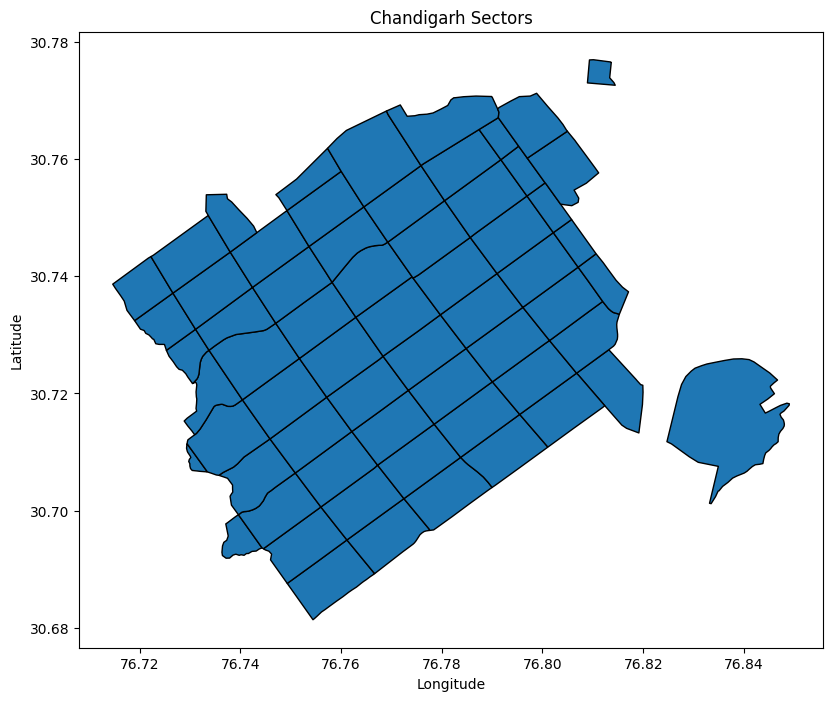

In [4]:
# Load the shapefile
cdg_shapefile = gpd.read_file("Chandigarh_Sectors.shp")

# Copy the geodataframe
cdg = cdg_shapefile.copy()

# Display first few rows
print("First few rows of the Chandigarh GeoDataFrame:")
print(cdg.head())

# Plot the Chandigarh sectors
print("\nPlotting the Chandigarh Sectors:")
cdg.plot(figsize=(10, 8), edgecolor='black')
plt.title("Chandigarh Sectors")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# 1. Contiguity Weights: Defining Neighbors by Shared Boundaries

Contiguity weights are based on the idea of **shared boundaries**. Two spatial units are considered neighbors if they share a border.

We have two main types of contiguity:

### 1.1 Rook Contiguity: Neighbors Share an Edge

Imagine a chessboard and a Rook piece. A Rook can move horizontally or vertically.  **Rook contiguity** is similar: two polygons are Rook neighbors if they share a common **edge** (boundary line).

**Example:** Think of squares on a grid. A square is a Rook neighbor to the squares directly above, below, to the left, and to the right of it.

Summary of Rook Contiguity Weights:
Number of observations: 63
Neighbors for each polygon (first 5): {0: 0, 1: 1, 2: 2, 3: 2, 4: 4}


/var/folders/13/p2nn0qmx63b6w_67cmcm1y7w0000gp/T/ipykernel_24893/3432320254.py:7: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  rook_weights = lp.weights.contiguity.Rook.from_dataframe(cdg)
/Users/anupamsobti/anaconda3/envs/geods/lib/python3.12/site-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 4 islands with ids: 0, 16, 18, 62.
  W.__init__(self, neighbors, ids=ids, **kw)
/var/folders/13/p2nn0qmx63b6w_67cmcm1y7w0000gp/T/ipykernel_24893/3432320254.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cdg["centroid"] = cdg.geometry.centroid


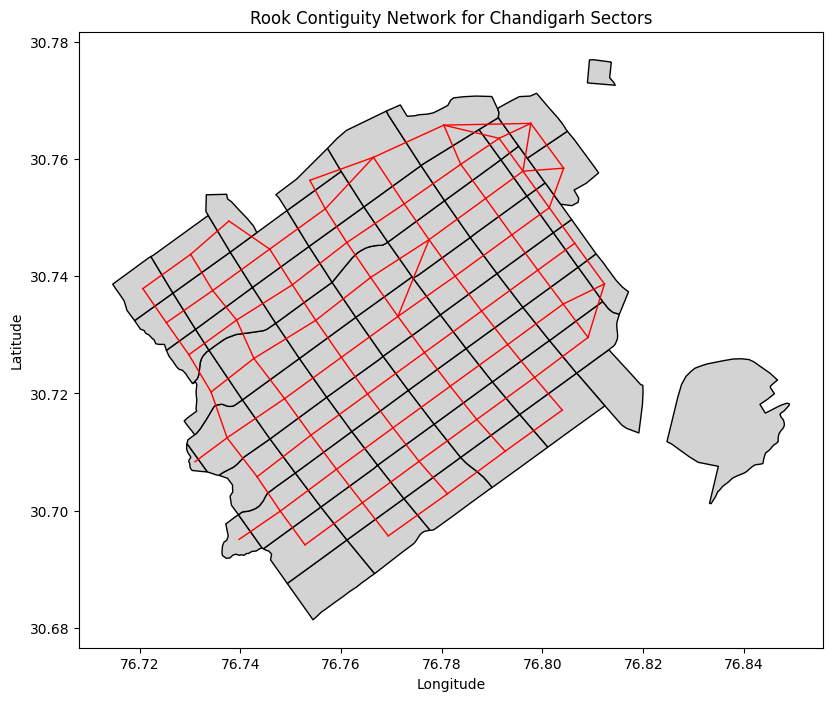

In [5]:
import libpysal as lp
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a Rook contiguity spatial weights matrix
rook_weights = lp.weights.contiguity.Rook.from_dataframe(cdg)

# Print summary of the weights
print("Summary of Rook Contiguity Weights:")
print(f"Number of observations: {rook_weights.n}")  # Number of polygons
print(f"Neighbors for each polygon (first 5): {dict(list(rook_weights.cardinalities.items())[:5])}")  # First 5 sectors' neighbors count

# Compute centroids of polygons
cdg["centroid"] = cdg.geometry.centroid

# Convert to a NetworkX graph for visualization
G = nx.Graph()
for key, neighbors in rook_weights.neighbors.items():
    for neighbor in neighbors:
        G.add_edge(key, neighbor)

# Plot the Chandigarh sectors
fig, ax = plt.subplots(figsize=(10, 8))
cdg.plot(ax=ax, edgecolor="black", facecolor="lightgray")

# Draw Rook contiguity network by connecting centroids
for edge in G.edges:
    point1 = cdg.iloc[edge[0]].centroid
    point2 = cdg.iloc[edge[1]].centroid
    plt.plot([point1.x, point2.x], [point1.y, point2.y], color='red', linewidth=1)

plt.title("Rook Contiguity Network for Chandigarh Sectors")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## **Explanation of Rook Weights Output:**

- **`lp.weights.contiguity.Rook.from_dataframe(cdg)`**  
  - This line computes the **Rook contiguity weights**, defining neighbors based on shared edges in the **`cdg`** GeoDataFrame.

- **`rook_weights.n`**  
  - The total number of spatial units (sectors in our case). This tells us how many polygons (Chandigarh sectors) are included in the spatial weights matrix.

- **`rook_weights.cardinalities`**  
  - A dictionary that shows the **number of neighbors** each sector has. You can inspect the first few using:
    ```python
    dict(list(rook_weights.cardinalities.items())[:5])  # First 5 sectors' neighbor counts
    ```

- **`rook_weights.neighbors[first_sector_id]`**  
  - A dictionary where the **keys** are sector IDs and the **values** are lists of neighboring sector IDs.  
  - Example: If `rook_weights.neighbors[3] = [2, 4, 5]`, it means **sector 3** has sectors **2, 4, and 5** as Rook neighbors.

- **`rook_weights.weights[first_sector_id]`**  
  - A dictionary showing **weights associated with each neighbor**.  
  - For **Rook contiguity**, the weights are usually **binary (1 or 0)**:
    - **1** if two sectors share an edge (i.e., they are neighbors).
    - **0** if they are not neighbors.
  - Example:  
    ```python
    rook_weights.weights[3]  # Output: [1, 1, 1]
    ```
    This means sector **3** has three neighbors, each assigned a weight of **1**.

---

### **Extra Notes:**
- **If a sector has fewer neighbors, it might be on the boundary of Chandigarh.**
- **If a sector has many neighbors, it's likely a central area surrounded by multiple sectors.**
- **You can visualize the connections by plotting the centroids and linking them, as shown in the previous code.**


### 1.2 Queen Contiguity: Neighbors Share an Edge or a Vertex

Now, think of a Queen in chess. A Queen can move horizontally, vertically, and **diagonally**. **Queen contiguity** is more inclusive than Rook contiguity. Two polygons are Queen neighbors if they share a common **edge** OR a **vertex** (a corner point).

**Example:** On a grid of squares, a square is a Queen neighbor to squares above, below, left, right, AND diagonally adjacent to it.

/var/folders/13/p2nn0qmx63b6w_67cmcm1y7w0000gp/T/ipykernel_24893/4071047948.py:7: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  queen_weights = lp.weights.contiguity.Queen.from_dataframe(cdg)
/Users/anupamsobti/anaconda3/envs/geods/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 18, 62.
  W.__init__(self, neighbors, ids=ids, **kw)
/var/folders/13/p2nn0qmx63b6w_67cmcm1y7w0000gp/T/ipykernel_24893/4071047948.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cdg["centroid"] = cdg.geometry.centroid


Summary of Queen Contiguity Weights:
Number of observations: 63
Neighbors for each polygon (first 5): {0: 1, 1: 2, 2: 4, 3: 5, 4: 6}


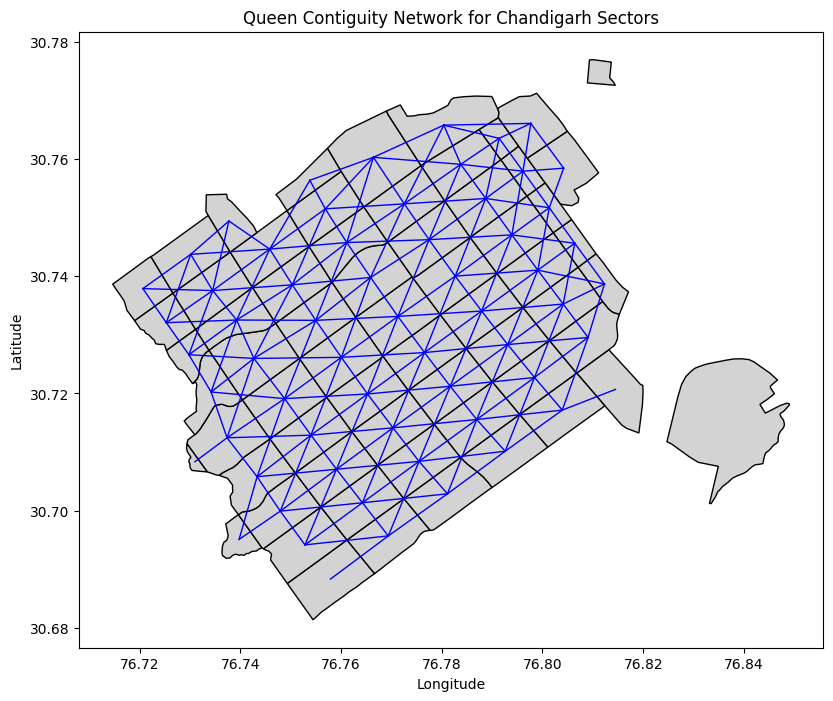

In [6]:
import libpysal as lp
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a Queen contiguity spatial weights matrix
queen_weights = lp.weights.contiguity.Queen.from_dataframe(cdg)

# Print summary of the weights
print("Summary of Queen Contiguity Weights:")
print(f"Number of observations: {queen_weights.n}")  # Number of polygons
print(f"Neighbors for each polygon (first 5): {dict(list(queen_weights.cardinalities.items())[:5])}")  # First 5 sectors' neighbor counts

# Compute centroids of polygons
cdg["centroid"] = cdg.geometry.centroid

# Convert to a NetworkX graph for visualization
G = nx.Graph()
for key, neighbors in queen_weights.neighbors.items():
    for neighbor in neighbors:
        G.add_edge(key, neighbor)

# Plot the Chandigarh sectors
fig, ax = plt.subplots(figsize=(10, 8))
cdg.plot(ax=ax, edgecolor="black", facecolor="lightgray")

# Draw Queen contiguity network by connecting centroids
for edge in G.edges:
    point1 = cdg.iloc[edge[0]].centroid
    point2 = cdg.iloc[edge[1]].centroid
    plt.plot([point1.x, point2.x], [point1.y, point2.y], color='blue', linewidth=1)

plt.title("Queen Contiguity Network for Chandigarh Sectors")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Notice the difference in histograms of rook and queen neighbors.

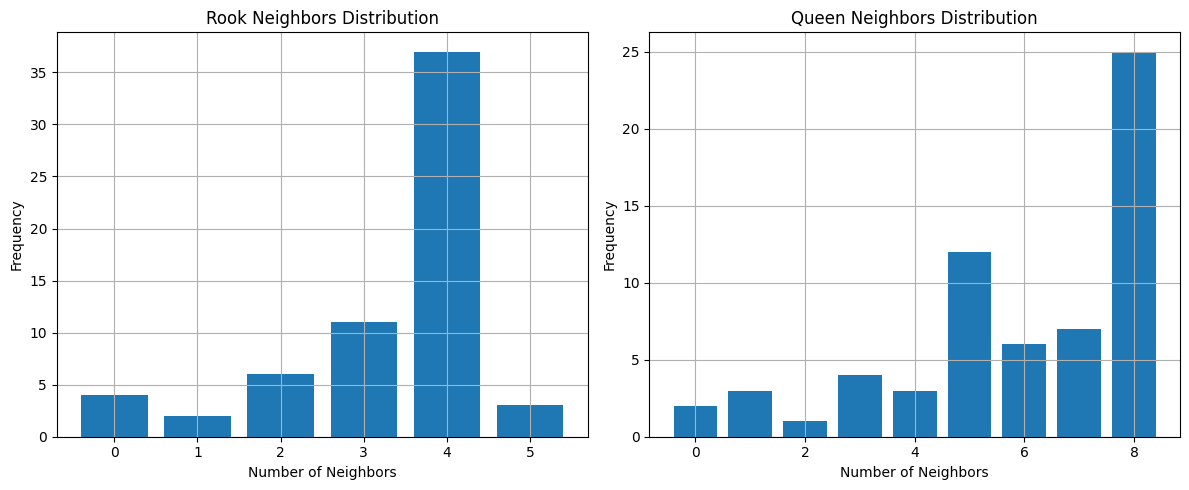

In [7]:
import pandas as pd

rooks = pd.Series(rook_weights.cardinalities)
queens = pd.Series(queen_weights.cardinalities)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for Rook neighbors
rooks.hist(ax=ax1, bins=range(min(rooks), max(rooks)+2), align='left', rwidth=0.8)
ax1.set_title('Rook Neighbors Distribution')
ax1.set_xlabel('Number of Neighbors')
ax1.set_ylabel('Frequency')

# Plot histogram for Queen neighbors
queens.hist(ax=ax2, bins=range(min(queens), max(queens)+2), align='left', rwidth=0.8)
ax2.set_title('Queen Neighbors Distribution')
ax2.set_xlabel('Number of Neighbors')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## **Comparing Rook and Queen Contiguity**

Run both the **Rook** and **Queen** weight calculation cells. Notice the following differences:

- The **average number of neighbors** is usually **higher** for **Queen contiguity** than for **Rook contiguity**.  
  - This is because **Queen contiguity** includes **both edge-sharing and vertex-sharing** neighbors, whereas **Rook contiguity** only includes **edge-sharing** neighbors.
  
- If you compare the **neighbor lists** for the same sector (e.g., `rook_weights.neighbors[sector_id]` vs. `queen_weights.neighbors[sector_id]`), you'll see that:  
  - The **Queen neighbor list is always the same length or longer** than the **Rook neighbor list**, but never shorter.
  - Queen contiguity is **always at least as inclusive** as Rook contiguity.

---

## **When to Use Rook vs. Queen?**
The choice between **Rook** and **Queen** depends on how you want to define "neighborhood" in spatial analysis.

### **Use Rook Contiguity When:**
✅ You want a **more restrictive** neighborhood definition.  
✅ **Only sectors that share a full edge** are considered neighbors.  
✅ Appropriate when **influence is believed to spread primarily through shared boundaries** (e.g., road connectivity, zoning, water flow).

### **Use Queen Contiguity When:**
✅ You need a **more inclusive** neighborhood definition.  
✅ **Sectors that share an edge or just a vertex (corner)** are considered neighbors.  
✅ Useful when **influence can spread in all directions**, even diagonally (e.g., social interactions, land use changes, ecological diffusion).  

---

## **Key Takeaway**  
- **Rook is more restrictive (only shared edges).**  
- **Queen is more inclusive (shared edges + vertices).**  
- **Queen neighbors ≥ Rook neighbors for all sectors.**  

This means **if you need a more generalized spatial relationship, use Queen contiguity**. If you need stricter adjacency rules, **use Rook contiguity**.


Note that spatial weights also work for rasters.

# 2. Distance-Based Weights: Defining Neighbors by Proximity

Contiguity weights are useful, but sometimes "neighborhood" is better defined by **distance**.  Distance-based weights consider spatial units to be neighbors if they are within a certain distance of each other.

### 2.1 Distance Band Weights: Neighbors within a Threshold Distance

**Distance band weights** define neighbors as all spatial units that are within a specified **distance threshold** (also called a bandwidth) of each other.  Units outside this distance are not considered neighbors.

**Example:** Imagine drawing a circle of a certain radius around each county. All other counties whose centroids (center points) fall within that circle are considered neighbors.

/var/folders/13/p2nn0qmx63b6w_67cmcm1y7w0000gp/T/ipykernel_24893/1269838408.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cdg["centroid"] = cdg.geometry.centroid


Summary of Distance Band Weights:
Number of observations: 63
Neighbors for each polygon (first 5): {0: 6, 1: 6, 2: 8, 3: 7, 4: 10}


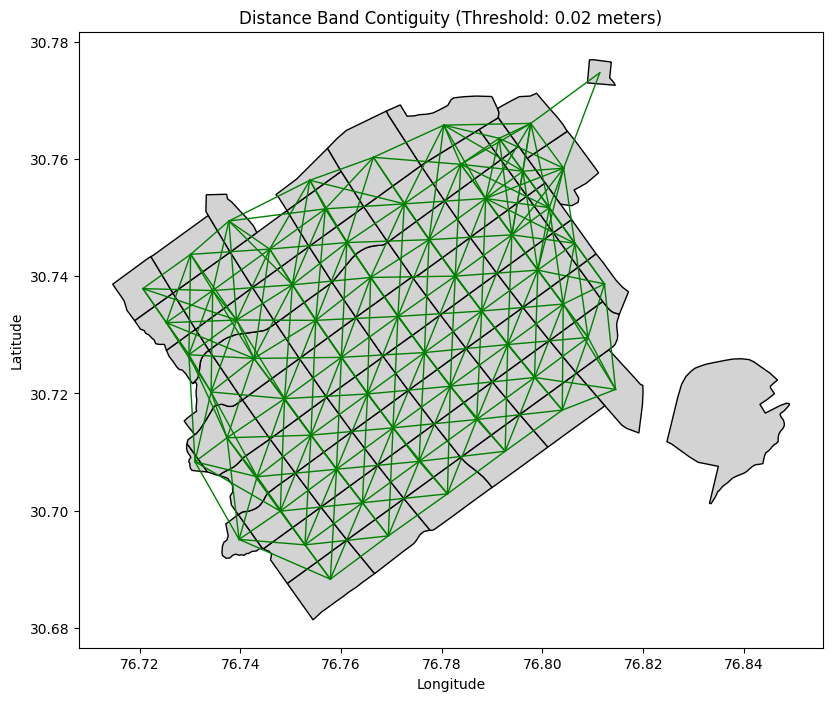

In [16]:
import libpysal as lp
import geopandas as gpd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Compute centroids of polygons
cdg["centroid"] = cdg.geometry.centroid

# Define a distance threshold (adjust based on your data)
distance_threshold = 0.020  # in meters (adjust as needed)

# Create a Distance Band spatial weights matrix
distance_weights = lp.weights.DistanceBand.from_dataframe(cdg, threshold=distance_threshold, silence_warnings=True)

# Print summary of the distance-based weights
print("Summary of Distance Band Weights:")
print(f"Number of observations: {distance_weights.n}")  # Number of sectors
print(f"Neighbors for each polygon (first 5): {dict(list(distance_weights.cardinalities.items())[:5])}")  # First 5 neighbor counts

# Convert to a NetworkX graph for visualization
G = nx.Graph()
for key, neighbors in distance_weights.neighbors.items():
    for neighbor in neighbors:
        G.add_edge(key, neighbor)

# Plot the Chandigarh sectors
fig, ax = plt.subplots(figsize=(10, 8))
cdg.plot(ax=ax, edgecolor="black", facecolor="lightgray")

# Draw distance-based connections by linking centroids
for edge in G.edges:
    point1 = cdg.iloc[edge[0]].centroid
    point2 = cdg.iloc[edge[1]].centroid
    plt.plot([point1.x, point2.x], [point1.y, point2.y], color='green', linewidth=1)

plt.title(f"Distance Band Contiguity (Threshold: {distance_threshold} meters)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## **Explanation of Distance Band Weights:**

- **`distance_threshold = 2000` (meters):**  
  - We set a **distance threshold** of **2000 meters (2 km)** to define neighbors.  
  - You should choose an appropriate threshold based on your data's **coordinate system** and **spatial scale**.  
  - **Important:** The units of `threshold` match the coordinate system of your **GeoDataFrame**:
    - If using a **projected coordinate system** (e.g., UTM), the threshold is in **meters or kilometers**.
    - If using **latitude/longitude** (degrees), 1 degree ≈ **111 km** (varies with latitude).

- **`lp.weights.DistanceBand.from_dataframe(cdg, threshold=distance_threshold)`:**  
  - This function **calculates distance band weights** based on the defined **distance threshold**.  
  - Only sectors **within 2000 meters** of each other (centroid-to-centroid) are considered **neighbors**.

- **Choosing the `distance_threshold`:**  
  - This is a **crucial step** and requires **experimentation**:
    - **Too small** a threshold → **Few or no neighbors**, missing important spatial relationships.
    - **Too large** a threshold → **Everything becomes a neighbor**, reducing spatial specificity.
  - A good approach:
    - **Test different thresholds** and observe **how the neighbor structure changes**.
    - **Plot the distance-based network** (as in the visualization) to check connectivity.


# 2.2 Inverse Distance Weights: Weighting Neighbors by Distance

**Inverse distance weights** go a step further. Instead of just defining neighbors within a threshold, they assign weights that are **inversely proportional to the distance** between spatial units.  The closer two units are, the higher the weight; the farther apart, the lower the weight.

A common formula is:

`weight = 1 / (distance ^ power)`

Where:
*   `distance` is the distance between the units.
*   `power` is an exponent that controls how quickly the weight decreases with distance.  A higher `power` means weights decay more rapidly with distance.

Summary of Inverse Distance Weights:
Number of observations: 63
Neighbors for each polygon (first 5): {0: 6, 1: 6, 2: 6, 3: 6, 4: 6}


/var/folders/13/p2nn0qmx63b6w_67cmcm1y7w0000gp/T/ipykernel_24893/1602084276.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cdg["centroid"] = cdg.geometry.centroid


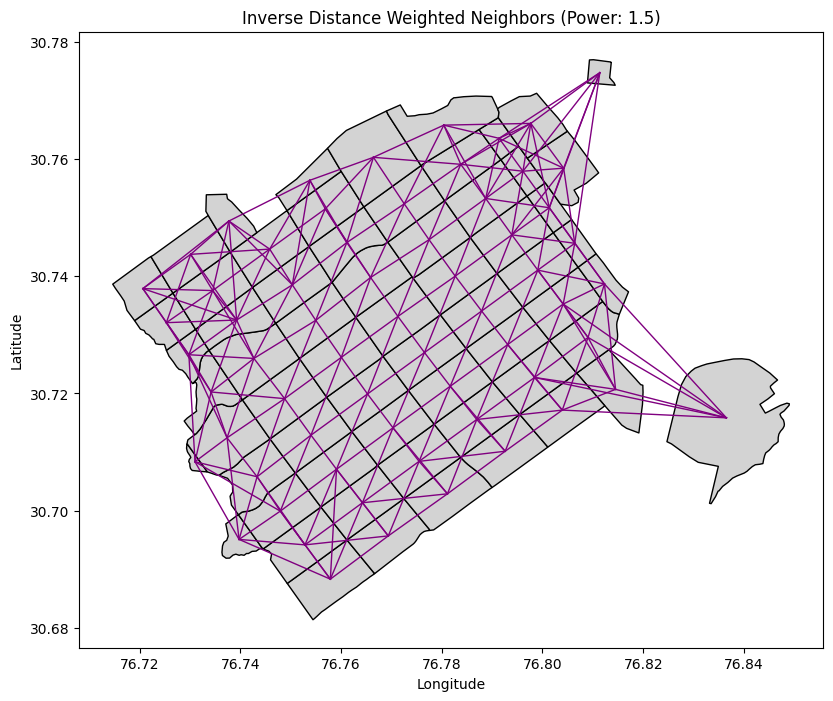

In [9]:
import libpysal as lp
import geopandas as gpd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Compute centroids of polygons
cdg["centroid"] = cdg.geometry.centroid

# Define a power parameter for inverse distance weighting
power = 1.5  # Higher power -> faster decay of influence with distance

# Create an Inverse Distance Weights matrix
inverse_distance_weights = lp.weights.KNN.from_dataframe(cdg, k=6)  # Using 6 nearest neighbors
for key in inverse_distance_weights.neighbors:
    distances = [
        cdg.iloc[key].centroid.distance(cdg.iloc[neighbor].centroid) 
        for neighbor in inverse_distance_weights.neighbors[key]
    ]
    inverse_distance_weights.weights[key] = [1 / (d**power) if d > 0 else 0 for d in distances]

# Print summary of the inverse distance weights
print("Summary of Inverse Distance Weights:")
print(f"Number of observations: {inverse_distance_weights.n}")  # Number of sectors
print(f"Neighbors for each polygon (first 5): {dict(list(inverse_distance_weights.cardinalities.items())[:5])}")  # First 5 neighbor counts

# Convert to a NetworkX graph for visualization
G = nx.Graph()
for key, neighbors in inverse_distance_weights.neighbors.items():
    for neighbor in neighbors:
        G.add_edge(key, neighbor)

# Plot the Chandigarh sectors
fig, ax = plt.subplots(figsize=(10, 8))
cdg.plot(ax=ax, edgecolor="black", facecolor="lightgray")

# Draw inverse distance-based connections by linking centroids
for edge in G.edges:
    point1 = cdg.iloc[edge[0]].centroid
    point2 = cdg.iloc[edge[1]].centroid
    plt.plot([point1.x, point2.x], [point1.y, point2.y], color='purple', linewidth=1)

plt.title(f"Inverse Distance Weighted Neighbors (Power: {power})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## **Explanation of Inverse Distance Weights**

- **`lp.weights.KNN.from_dataframe(cdg, k=6)`:**  
  - This creates an **Inverse Distance Weights matrix** based on **k-nearest neighbors** (default `k=6`).  
  - Instead of a fixed distance threshold, each sector **always has `k` neighbors**, ensuring no isolated sectors.  

- **Inverse Distance Weight Formula:**  
  - After defining `k` nearest neighbors, the weights are calculated as:  
    \[
    \text{weight} = \frac{1}{\text{distance}^{\text{power}}}
    \]
  - **`power = 1.5`** (adjustable):  
    - Controls **how quickly weights decay** with increasing distance.  
    - A **higher power** (e.g., `power=2`) means that **distant neighbors have much smaller weights**.  
    - A **lower power** (e.g., `power=1`) means **distance has a weaker effect**, so far-away neighbors still have significant influence.  

- **Weights are Continuous:**  
  - Unlike **contiguity (Rook/Queen)** or **distance band weights**, inverse distance weights are **continuous values**.
  - **Closer neighbors have higher weights**, and **farther neighbors have lower weights**.
  - Some weights may be **greater than 1**, depending on the power and distance.

- **Ensures Every Unit Has Neighbors:**  
  - Using `k=6` ensures that **each sector has at least 6 neighbors**, even if it's isolated.  
  - This prevents problems where some sectors have **no connections** in sparse areas.  
  - If you want to consider **all sectors as neighbors**, you can use `DistanceBand` with a large cutoff instead.

- **Customizing Neighbor Selection:**  
  - You can **increase `k`** for more neighbors (e.g., `k=10` for denser connections).  
  - You can also **apply a distance cutoff** (e.g., only considering neighbors within `5000 meters`).

---

## **Key Differences from Distance Band Weights**
✅ **All sectors have neighbors** (even isolated ones) because `k` nearest neighbors are always assigned.  
✅ **Weights are continuous, not binary** (closer = higher weight).  
✅ **Can model gradual spatial effects**, like economic influence or pollution spread.  
✅ **Easier to control neighborhood size** via `k` or `power`.  

---

### **When to Use Inverse Distance Weights?**
- **Use this when influence decays with distance**, rather than being a fixed threshold.
- **Good for modeling gradual spatial relationships**, like:
  - **Air pollution** (closer areas have stronger effects).
  - **Economic spillover** (neighboring cities affect each other more if they’re closer).
  - **Disease spread** (closer regions are more affected).  

---


# 3. K-Nearest Neighbors (KNN) Weights: Fixed Number of Neighbors

**K-Nearest Neighbors (KNN) weights** define neighborhoods based on a **fixed number of nearest neighbors**. For each spatial unit, you specify `k` (the number of neighbors you want). The KNN weight calculation then finds the `k` closest spatial units and considers them neighbors.

**Why use KNN weights?**

*   **Adaptive Neighborhoods:**  KNN weights are useful when the density of your spatial units varies across the study area. In dense areas, neighbors will be close; in sparse areas, neighbors will be farther away, but you always have exactly `k` neighbors for each unit.
*   **Ensuring Connectivity:**  KNN weights can help ensure that all spatial units have at least some neighbors, which can be important for certain spatial analysis techniques.

/var/folders/13/p2nn0qmx63b6w_67cmcm1y7w0000gp/T/ipykernel_24893/4129287472.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cdg["centroid"] = cdg.geometry.centroid


Summary of K-Nearest Neighbors (KNN) Weights:
Number of observations: 63
Neighbors for each polygon (first 5): {0: 6, 1: 6, 2: 6, 3: 6, 4: 6}


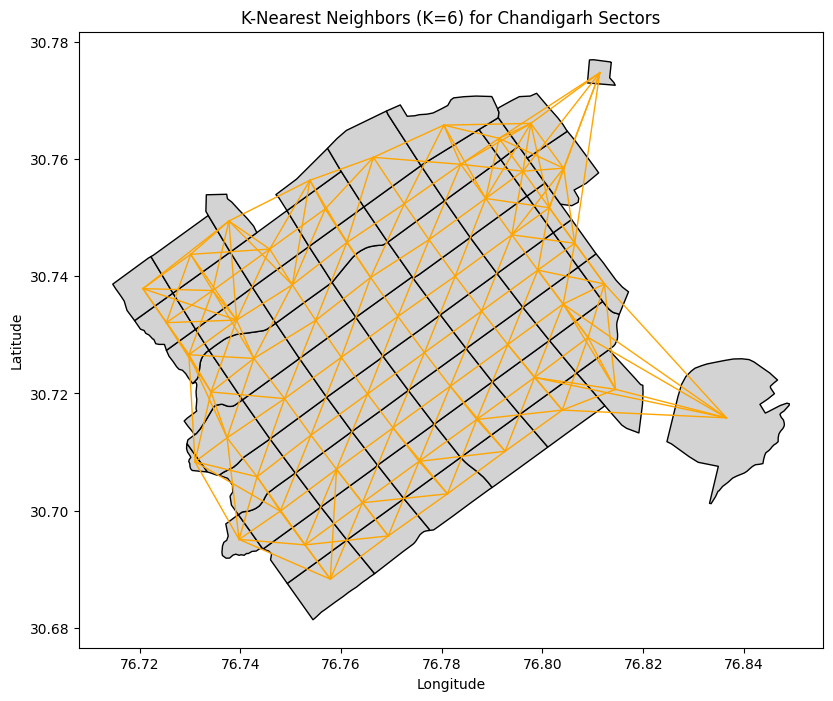

In [10]:
import libpysal as lp
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

# Compute centroids of polygons
cdg["centroid"] = cdg.geometry.centroid

# Define the number of nearest neighbors (k)
k_neighbors = 6  # Adjust based on your data and analysis needs

# Create K-Nearest Neighbors (KNN) spatial weights matrix
knn_weights = lp.weights.KNN.from_dataframe(cdg, k=k_neighbors)

# Print summary of the KNN weights
print("Summary of K-Nearest Neighbors (KNN) Weights:")
print(f"Number of observations: {knn_weights.n}")  # Number of sectors
print(f"Neighbors for each polygon (first 5): {dict(list(knn_weights.cardinalities.items())[:5])}")  # First 5 neighbor counts

# Convert to a NetworkX graph for visualization
G = nx.Graph()
for key, neighbors in knn_weights.neighbors.items():
    for neighbor in neighbors:
        G.add_edge(key, neighbor)

# Plot the Chandigarh sectors
fig, ax = plt.subplots(figsize=(10, 8))
cdg.plot(ax=ax, edgecolor="black", facecolor="lightgray")

# Draw KNN connections by linking centroids
for edge in G.edges:
    point1 = cdg.iloc[edge[0]].centroid
    point2 = cdg.iloc[edge[1]].centroid
    plt.plot([point1.x, point2.x], [point1.y, point2.y], color='orange', linewidth=1)

plt.title(f"K-Nearest Neighbors (K={k_neighbors}) for Chandigarh Sectors")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## **Explanation of KNN Weights**

- **`k_neighbors = 6`**  
  - We set `k = 6`, meaning **each sector will have exactly 6 nearest neighbors**.  
  - You can adjust `k` to increase or decrease the number of neighbors.  

- **`lp.weights.KNN.from_dataframe(cdg, k=k_neighbors)`**  
  - This calculates **K-Nearest Neighbors (KNN) weights**.  
  - Each sector is assigned **its `k` closest neighbors based on centroid distances**.  

- **Ensuring `k` Neighbors per Unit**  
  - The **average number of neighbors** will be **very close to `k` (6 in this case)**.  
  - However, **some units might have slightly more or fewer neighbors** due to **ties in distances** (e.g., if two sectors are exactly the same distance away).  

- **KNN Weights Can Be Binary or Distance-Based**  
  - By default, `libpysal` creates **binary KNN weights**:
    - **1** if two units are neighbors (one of the `k` nearest).
    - **0** if they are not.  
  - However, KNN weights **can also be based on distance**:
    - Instead of binary weights, weights can be assigned as **inverse distances** to account for proximity.  
    - This can be done by manually adjusting weights after computing neighbors.  
  - See the **`libpysal` documentation** for more advanced distance-weighted KNN options.

---

## **Why Use KNN Weights?**
✅ **Ensures every spatial unit has neighbors**, preventing isolated points.  
✅ **Adaptive to different spatial densities**—in dense areas, neighbors are close; in sparse areas, they may be farther apart.  
✅ **Useful for spatial models that require a minimum number of neighbors per unit** (e.g., Moran’s I, spatial regression).  
✅ **Can be customized with `k` and distance-based weighting** to fine-tune the spatial relationship.  

---

### **When to Use KNN vs. Other Spatial Weights?**
- **Use KNN when you need a fixed number of neighbors per unit.**
- **Use Contiguity Weights (Rook/Queen) when adjacency (shared borders) matters.**
- **Use Distance-Based Weights when absolute spatial distance is the key factor.**

---

# 4.  Kernel Weights: Smooth Distance Decay

**Kernel weights** are a more advanced type of distance-based weights. They provide a **smooth and flexible way to model distance decay**. Instead of a sharp cutoff like in distance band weights or a simple inverse distance function, kernel weights use a kernel function to define how weights decrease with distance.

**Kernel Functions:** There are different types of kernel functions you can use, such as:

*   **Gaussian Kernel:**  Weights decay smoothly and rapidly, following a bell-shaped curve.
*   **Uniform Kernel:**  All units within a bandwidth get a constant weight, and weights are zero beyond the bandwidth (similar to distance band, but can be formulated as a kernel).
*   **Triangular Kernel:** Weights decrease linearly from the center of the bandwidth to the edge.
*   **Quadratic Kernel:** Weights decay quadratically.

Kernel weights are often used in spatial smoothing and density estimation techniques. They are more complex than the weights we've seen so far, and we'll just introduce them conceptually here.  If you want to delve deeper, explore the `weights.Kernel` function in `libpysal`.

**Kernel Weights - Conceptual Summary:**

*   Kernel weights offer a more flexible way to model distance decay using different kernel functions.
*   They are often used in more advanced spatial analysis techniques where smooth weighting is beneficial.
*   Exploring `libpysal.weights.Kernel` and different kernel types can be a next step in your spatial weights learning journey.

/var/folders/13/p2nn0qmx63b6w_67cmcm1y7w0000gp/T/ipykernel_24893/3158477430.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cdg["centroid"] = cdg.geometry.centroid


Summary of Kernel Weights:
Number of observations: 63
Neighbors for each polygon (first 5): {0: 63, 1: 63, 2: 63, 3: 63, 4: 63}


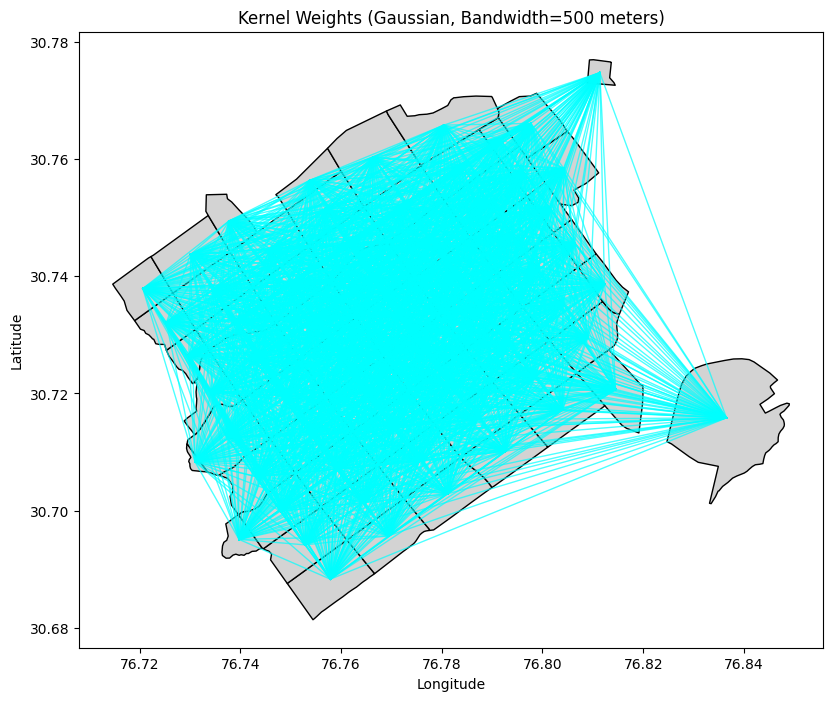

In [11]:
import libpysal as lp
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

# Compute centroids of polygons
cdg["centroid"] = cdg.geometry.centroid

# Define a bandwidth for kernel weights (adjust based on your dataset)
bandwidth = 500  # in meters (adjust as needed)

# Create Kernel Weights using a Gaussian kernel
kernel_weights = lp.weights.Kernel.from_dataframe(cdg, fixed=True, bandwidth=bandwidth, function="gaussian")

# Print summary of Kernel Weights
print("Summary of Kernel Weights:")
print(f"Number of observations: {kernel_weights.n}")  # Number of sectors
print(f"Neighbors for each polygon (first 5): {dict(list(kernel_weights.cardinalities.items())[:5])}")  # First 5 neighbor counts

# Convert to a NetworkX graph for visualization
G = nx.Graph()
for key, neighbors in kernel_weights.neighbors.items():
    for neighbor in neighbors:
        G.add_edge(key, neighbor)

# Plot the Chandigarh sectors
fig, ax = plt.subplots(figsize=(10, 8))
cdg.plot(ax=ax, edgecolor="black", facecolor="lightgray")

# Draw Kernel-weighted connections by linking centroids
for edge in G.edges:
    point1 = cdg.iloc[edge[0]].centroid
    point2 = cdg.iloc[edge[1]].centroid
    plt.plot([point1.x, point2.x], [point1.y, point2.y], color='cyan', linewidth=1, alpha=0.7)

plt.title(f"Kernel Weights (Gaussian, Bandwidth={bandwidth} meters)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Different bandwidths and kernels are as follows:

![Image](image.png)

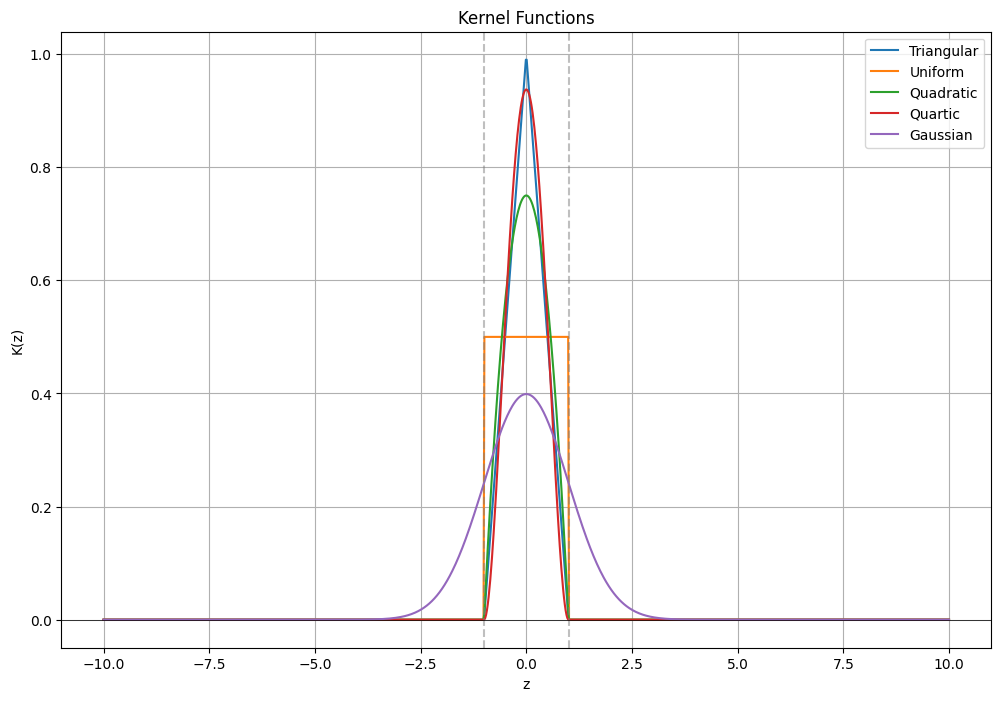

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Create z values
z = np.linspace(-10, 10, 1000)

# Define kernel functions
def triangular(z):
    return np.where(np.abs(z) <= 1, (1 - np.abs(z)), 0)

def uniform(z):
    return np.where(np.abs(z) <= 1, 0.5, 0)

def quadratic(z):
    return np.where(np.abs(z) <= 1, (3/4)*(1 - z**2), 0)

def quartic(z):
    return np.where(np.abs(z) <= 1, (15/16)*(1 - z**2)**2, 0)

def gaussian(z):
    return (2*np.pi)**(-1/2) * np.exp(-z**2/2)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each kernel function
plt.plot(z, triangular(z), label='Triangular')
plt.plot(z, uniform(z), label='Uniform')
plt.plot(z, quadratic(z), label='Quadratic')
plt.plot(z, quartic(z), label='Quartic')
plt.plot(z, gaussian(z), label='Gaussian')

# Add labels and title
plt.xlabel('z')
plt.ylabel('K(z)')
plt.title('Kernel Functions')
plt.legend()
plt.grid(True)

# Add vertical lines at z = -1 and z = 1
plt.axvline(x=-1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)

# Show the plot
plt.show()

## **Explanation of Kernel Weights**

**Kernel weights** provide a **smooth and flexible way** to model spatial influence. Instead of a **sharp cutoff** (as in distance band weights) or a **simple inverse function** (as in inverse distance weights), kernel weights use **mathematical functions** to determine **how weights decay with distance**.

---

### **Key Parameters in Kernel Weights:**
- **`bandwidth = 500` (meters)**  
  - This defines the **range of influence**.  
  - Nearby sectors **within this distance** have higher weights.  
  - Sectors **beyond this distance** still get weights, but they **decay smoothly** toward zero.
  
- **`lp.weights.Kernel.from_dataframe(cdg, fixed=True, bandwidth=bandwidth, function="gaussian")`**  
  - Creates a **Kernel Weights matrix** where **weights decay based on distance**.  
  - **`fixed=True`** → Uses a **fixed bandwidth** for all sectors.  
  - **`function="gaussian"`** → Uses a **Gaussian (bell-shaped) kernel** for **smooth weight decay**.  

---

### **Types of Kernel Functions:**
Kernel functions define **how** spatial influence decreases with distance:

- **📈 Gaussian Kernel (default)** → Smooth, bell-shaped decay.  
- **🟧 Uniform Kernel** → All neighbors within the bandwidth get the **same weight**, others get **zero**.  
- **🔻 Triangular Kernel** → Weights **decrease linearly** from center to edge of the bandwidth.  
- **🟦 Quadratic Kernel** → Weights **decay quadratically** for more gradual influence loss.  

---

### **How Kernel Weights Differ from Other Methods:**
| Method | Weight Decay | Pros | Cons |
|--------|-------------|------|------|
| **Contiguity (Rook/Queen)** | 1 (if touching), 0 (otherwise) | Simple, intuitive | Ignores distance |
| **Distance Band** | 1 (within range), 0 (outside) | Easy to define | Sharp cutoff |
| **Inverse Distance** | 1 / distance^power | Distance-sensitive | No smooth transition |
| **KNN** | Fixed `k` nearest neighbors | Ensures every unit has `k` neighbors | No distance weighting |
| **Kernel (Gaussian, etc.)** | Smooth, function-based decay | Most flexible, realistic influence | Harder to interpret |

---

### **Why Use Kernel Weights?**
✅ **Flexible and smooth weight decay** (no abrupt cutoff).  
✅ **More realistic for continuous spatial processes** (e.g., pollution, economic activity).  
✅ **Can model different types of spatial relationships** using **different kernel functions**.  
✅ **Works well for spatial smoothing and density estimation**.  

---

### **When to Use Kernel Weights vs. Other Methods?**
- **Use Kernel Weights** if you want **gradual, smooth influence decay**.  
- **Use Distance Band Weights** for a strict **inside/outside** neighbor definition.  
- **Use Inverse Distance Weights** if you want a **mathematically simple** distance-based approach.  
- **Use KNN Weights** if you need **exactly `k` neighbors per unit**.

---

# **Conclusion: Choosing the Right Spatial Weights**

We have explored various **spatial weights methods**, including:
- **Contiguity Weights** (Rook, Queen)
- **Distance-Based Weights** (Distance Band, Inverse Distance)
- **K-Nearest Neighbors (KNN)**
- **Kernel Weights** (Gaussian, Uniform, etc.)

## **How to Choose the Right Spatial Weights?**
There's no **single "best" choice**—it depends on **your research question, data, and theoretical considerations**.  

Here’s a **quick guide** to help you decide:

| **Spatial Weights Type** | **Best When...** | **Pros** | **Cons** |
|--------------------------|-----------------|----------|----------|
| **Rook Contiguity** | Influence spreads via **shared borders** (e.g., political units) | Simple, interpretable | Ignores diagonal connections |
| **Queen Contiguity** | Influence spreads via **borders & corners** | More inclusive than Rook | Still ignores distance |
| **Distance Band** | You have a **fixed range of influence** (e.g., air pollution, traffic impact) | Ensures all close units are neighbors | Sharp cutoff—no gradual influence |
| **Inverse Distance** | Influence **decays with distance** (e.g., economic interactions) | Accounts for gradual influence loss | Needs careful choice of `power` |
| **K-Nearest Neighbors (KNN)** | You need **a fixed number of neighbors per unit** | Ensures every unit has neighbors | No distance-based weighting |
| **Kernel Weights** | Influence spreads **smoothly over distance** | Most flexible, smooth decay | Harder to interpret |

## **Key Takeaways**
- **Contiguity Weights** (Rook, Queen) → Best for **adjacency-based** spatial relationships.
- **Distance-Based Weights** → Best when **physical distance matters**.
- **KNN Weights** → Best when **each unit must have a fixed number of neighbors**.
- **Kernel Weights** → Best when you need **smooth, continuous influence decay**.

## **Next Steps: Applying Spatial Weights**
Now that you've learned about spatial weights, here’s how to **apply them in real-world analysis**:

✅ **Visualize spatial relationships**: Experiment with different `thresholds` (Distance Band), `power` (Inverse Distance), or `k` (KNN).  
✅ **Use weights in Spatial Autocorrelation Analysis**: Compute **Moran’s I** or **Geary’s C** to detect spatial patterns.  
✅ **Apply weights in Spatial Regression**: Incorporate spatial effects into models like **Spatial Lag Models (SLM)** and **Spatial Error Models (SEM)**.  
✅ **Explore `libpysal` documentation**: Learn more about **custom distance metrics, kernel functions, and advanced spatial analysis methods**.

---

